(A-stability-section)=

# A-stability

The plots of the region of absolute stability for the explicit RK4 method and the implicit Radau IA method are shown in {numref}`rk4-stability-region-plot` and {numref}`radauIA-stability-region-plot`. We can see that the region of absolute stability for the explicit method is bounded in the left-hand side of the complex plane, whereas the region of absolute stability for the implicit Radau IA method is unbounded. This means that the step length used for the RK4 method needs to be less than some value in order for the method to be stable, whereas for the Radua IA method the step length can be any value. This property is known as **A-stability**.

`````{grid}

````{grid-item}
```{glue:figure} rk4_stability_region
:name: rk4-stability-region-plot

Region of absolute stability for the RK4 method
```
````

````{grid-item}
```{glue:figure} radauIA_stability_region
:name: radauIA-stability-region-plot

Region of absolute stability for the Radua IA method
```
````
`````

```{prf:definition} A-stability
:label: a-stability-definition

A method is said to be **A-stable** if its region of absolute stability satisfies

$$ \{ z : z \in {\mathbb{C}}^- ,|R(z)| \leq 1\} $$
    
i.e., the method is stable for all points in the left-hand side of the complex plane.
```

```{prf:theorem} Conditions for A-stability
:label: a-stability-theorem

Given an implicit Runge-Kutta method with a stability function of the form

$$ R(z) = \frac{P(z)}{Q(z)} $$

and define the $E$-polynomial function

$$ E(y)=Q(iy)Q(-iy)-P(iy)P(-iy), $$(ey-definition)

then the method is A-stable if and only if the following are satisfied

- Criterion A: All roots of $Q(z)$ have positive real parts;

- Criterion B: $E(y)\geq 0$ for all $y\in \mathbb{R}$.
```

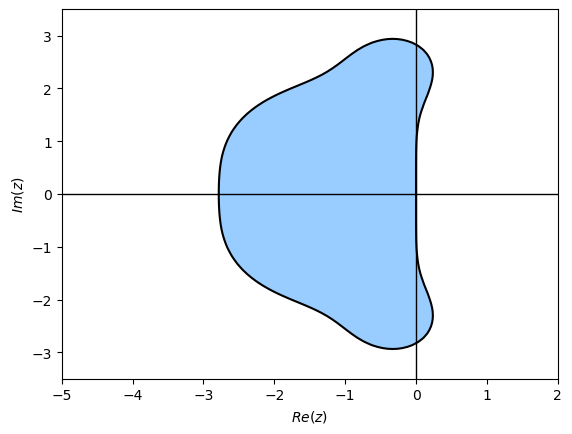

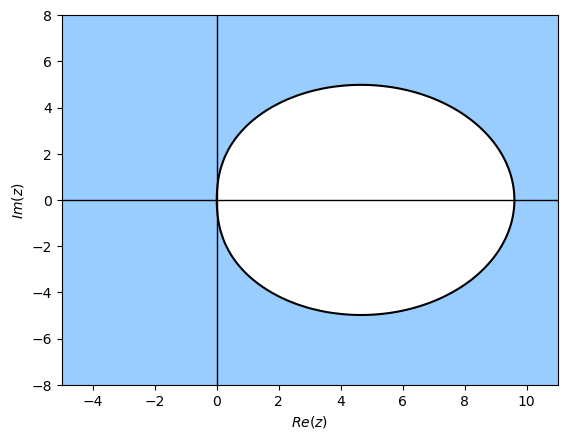

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate z values
xmin, xmax, ymin, ymax = -5, 2, -3.5, 3.5
X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = X + Y * 1j

# Define stability function
R = 1 + Z + 1/2 * Z ** 2 + 1/6 * Z ** 3 + 1/24 * Z ** 4

# Plot stability region
fig = plt.figure()
contour = plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.xlabel("$Re(z)$")
plt.ylabel("$Im(z)$")
plt.show()

from myst_nb import glue
glue("rk4_stability_region", fig, display=False)

# Generate z values
xmin, xmax, ymin, ymax = -5, 11, -8, 8
X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = X + Y * 1j

# Define stability function
R = (1 + 1/3 * Z + 1 / 16 * Z ** 2) / (1 - 2/3 * Z + 1/6 * Z ** 2)

# Plot stability region
fig = plt.figure()
contour = plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.xlabel("$Re(z)$")
plt.ylabel("$Im(z)$")
plt.show()

glue("radauIA_stability_region", fig, display=False)

````{prf:example}
:label: a-stability-example

The Radua IA method is defined by the following Butcher tableau

$$ \begin{array}{c|cc}
    0 & \frac{1}{4} & -\frac{1}{4} \\
    \frac{2}{3} & \frac{1}{4} & \frac{5}{12} \\ \hline
    & \frac{1}{4} & \frac{3}{4}
\end{array} $$

Determine whether this method is A-stable and plot the region of absolute stability.

---

**Solution**

We saw in {prf:ref}`irk-stability-function-example` that the stability function for the Radau IA method is

$$ \begin{align*}
    R(z) = \frac{1 + \frac{1}{3}z + \frac{1}{16}z^2}{1 - \frac{2}{3}z + \frac{1}{6}z^2}.
\end{align*} $$

Here $Q(z) = 1 - \frac{2}{3}z + \frac{1}{6}z^2$ which has roots at $z = 2 \pm \sqrt{2}$ which both have positive real parts so {prf:ref}`criterion A<a-stability-theorem>` for A-stability is satisfied. Using equation {eq}`ey-definition`

$$ \begin{align*}
    E(y) &= \left( 1 - \frac{2}{3} i y - \frac{1}{6}y^2 \right) \left( 1 + \frac{2}{3} i y - \frac{1}{6}y^2 \right) \\
    & \qquad - \left( 1 + \frac{1}{3} i y - \frac{1}{16} y^2 \right) \left( 1 - \frac{1}{3}i y - \frac{1}{16}y^2 \right) \\
    &= \left( 1 + \frac{2}{3}iy - \frac{1}{6}y^2 - \frac{2}{3} i y + \frac{4}{9}y^2 + \frac{1}{9} i y^3 - \frac{1}{6}y^2 - \frac{1}{9} i y^2 + \frac{1}{36} y^4 \right) \\
    & \qquad \left( 1 - \frac{1}{3} i y - \frac{1}{16}y^2 + \frac{1}{3} i y + \frac{1}{9} y^2 - \frac{1}{48} i y^2 - \frac{1}{16} y^2 + \frac{1}{48} i y^3 + \frac{1}{256} y^4 \right) \\
    &= \left( 1 + \frac{1}{9} y^2 + \frac{1}{36} y^4 \right) - \left( 1 - \frac{1}{72} y^2 + \frac{1}{256} y^4 \right) \\
    &= \frac{1}{8} y^2 + \frac{55}{2304} y^4.
\end{align*} $$

Since $y_2$ and $y_4$ are positive for all $y$ then $E(y)>0$ so {prf:ref}`criterion B<a-stability-theorem>` for A-stability is satisfied. Since both criterion A and B are satisfied then we can say that this is an A-stable method. 
````

---

## Code

The Python and MATLAB code used to determine the stability function for the IRK method from {prf:ref}`a-stability-example` is given below.

`````{tab-set}
````{tab-item} Python

```python
import sympy as sp

def P(z):
    return 1 + 1/3 * z + 1/16 * z ** 2

def Q(z):
    return 1 - 2/3 * z + 1/6 * z ** 2

# Check roots of Q(z)
sp.pprint(sp.solve(Q(z)))

# Check E(y)
y = sp.symbols('y')
sp.pprint(sp.simplify(Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)))
```
````

````{tab-item} MATLAB
```matlab
P = @(z) 1 + 1/3 * z + 1/16 * z ^ 2;
Q = @(z) 1 - 2/3 * z + 1/6 * z ^ 2;

% Check roots of Q(z)
solve(Q(z))

% Check E(y) >= 0
syms y
simplify(Q(1i * y) * Q(-1i * y) - P(1i * y) * P(-1i * y))
```
````
`````

In [5]:
import sympy as sp

def P(z):
    return 1 + 1/3 * z + 1/16 * z ** 2

def Q(z):
    return 1 - 2/3 * z + 1/6 * z ** 2

# Check roots of Q(z)
z = sp.symbols('z')
sp.pprint(sp.solve(Q(z)))

# Check E(y) >= 0
y = sp.symbols('y')
sp.pprint(sp.simplify(Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)))


[2.0 - 1.4142135623731⋅ⅈ, 2.0 + 1.4142135623731⋅ⅈ]
 2 ⎛                    2        ⎞
y ⋅⎝0.0238715277777778⋅y  + 0.125⎠
